## Recreating my favorite iOS 7 Wallpaper

I have a favorite iOS 7 Wallpaper that I occasionally lose track of and have to root out on the internet as it is no longer included in new iOS versions. One time I was looking for it and realized I would probably be able to generate it. This jupyter notebook is my attempt to recreate the wallpaper.

- The color of the dots has some range, as does the background.
- Question: Is it a repeating pattern horizontally?
- Task: Extract curves from vertical dimension for colors
- Each circle is 6x6px. Vertical distance from another circle is 6px. Horizontal distance from another circle is 3px.

In [117]:
from __future__ import print_function
from scipy import ndimage
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

image_path = '/Users/carlos/Downloads/204@2xiphone.png'

In [22]:
im = imageio.imread(image_path)

In [81]:
h, w, c = im.shape

# Repeating width is 6 for circle and 6 for space
repeat_width = 12
# Repeating height is 6 for circle and 3 for space, times 2 to include both circles
repeat_height = 18

# zero which is cool!
print('w % repeat_width', w % repeat_width)
# This is non-zero, but that's ok, we start with a circle and end with a circle, no space
print('h % repeat_height', h % repeat_height)

('w % repeat_width', 0)
('h % repeat_height', 6)


In [33]:
first_col = im[:, 0:repeat_width, :]
print('Size of first_col {first_col.shape}'.format(**locals()))

# Only doing up to w/5 since the rest also have this property
for block_start in range(0, w/5, repeat_width):
    block = im[:, block_start:block_start+repeat_width, :]
    error = np.sum(np.abs(block-first_col))
    all_equal = np.all(first_col==block)
    print('block start {block_start} shape {block.shape} is equal to first:{all_equal} error:{error}'.format(**locals()))

Size of first_col (1392, 12, 3)
block start 0 shape (1392, 12, 3) is equal to first:True error:0
block start 12 shape (1392, 12, 3) is equal to first:True error:0
block start 24 shape (1392, 12, 3) is equal to first:True error:0
block start 36 shape (1392, 12, 3) is equal to first:True error:0
block start 48 shape (1392, 12, 3) is equal to first:True error:0
block start 60 shape (1392, 12, 3) is equal to first:True error:0
block start 72 shape (1392, 12, 3) is equal to first:True error:0
block start 84 shape (1392, 12, 3) is equal to first:True error:0
block start 96 shape (1392, 12, 3) is equal to first:True error:0
block start 108 shape (1392, 12, 3) is equal to first:True error:0
block start 120 shape (1392, 12, 3) is equal to first:True error:0
block start 132 shape (1392, 12, 3) is equal to first:True error:0
block start 144 shape (1392, 12, 3) is equal to first:True error:0


In [35]:
# Now: is everything truly gray?
# Yes, since channel 0 has the same value as channel 1 and 2
print(np.all(im[:, :, 0] == im[:, :, 1]))
print(np.all(im[:, :, 0] == im[:, :, 2]))

True
True


(1392, 12, 3)
(1392,)


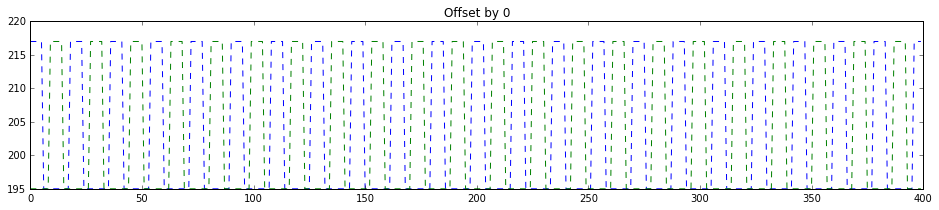

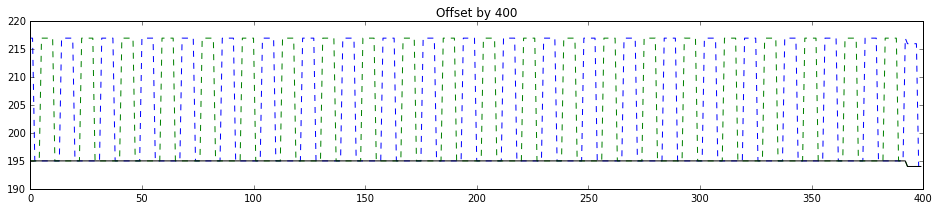

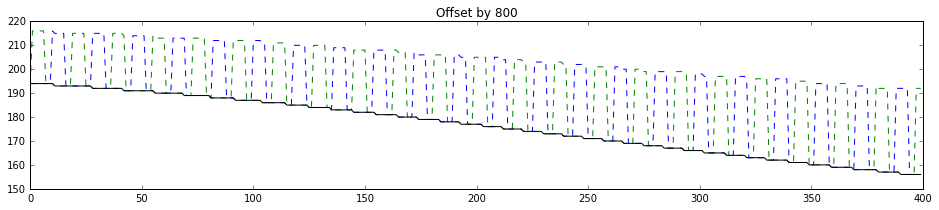

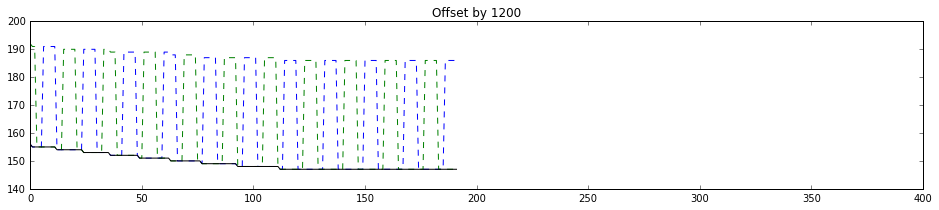

In [94]:
# Isolating the background and understanding the shapes

print(first_col.shape)

background = np.min(first_col[:, :, 0], axis=1)
print(background.shape)

for offset in range(0, h, 400):
    plt.figure(figsize=(16, 3))
    plt.title('Offset by {}'.format(offset))
    # 2, 3, 7, and 8 all have the same shapes, square, as they only take on the color of the circle or the background
    plt.plot(first_col[offset:offset+400, 2, 0], '--')
    plt.plot(first_col[offset:offset+400, 8, 0], '--')
    plt.plot(background[offset:offset+400], 'k')
    plt.xlim([0, 400])

False
True
True
False
True
True


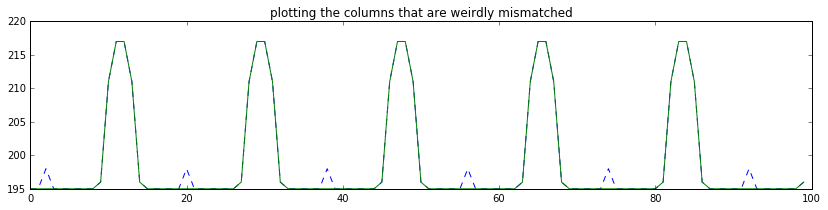

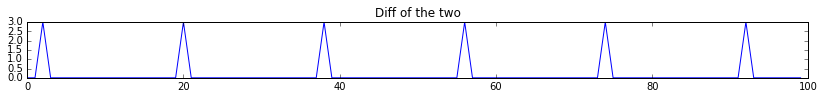

In [89]:
# Establishing some horizontal symmetries
# So most things are pretty similar, except there's one blip in the leftmost/rightmost columns for a circle in the
# background.
print(np.all(first_col[:, 0, 0] == first_col[:, 5, 0]))
print(np.all(first_col[:, 1, 0] == first_col[:, 4, 0]))
print(np.all(first_col[:, 2, 0] == first_col[:, 3, 0]))

print(np.all(first_col[:, 6, 0] == first_col[:, 11, 0]))
print(np.all(first_col[:, 7, 0] == first_col[:, 10, 0]))
print(np.all(first_col[:, 8, 0] == first_col[:, 9, 0]))

plt.figure(figsize=(14, 3))
plt.title('plotting the columns that are weirdly mismatched')
diff = first_col[:, 6, 0] - first_col[:, 11, 0]
plt.plot(first_col[:100, 6, 0], '--')
plt.plot(first_col[:100, 11, 0], '-')
plt.figure(figsize=(14, 1))
plt.title('Diff of the two')
plt.plot(diff[:100])

In [90]:
# Establishing some vertical symmetries. Blocks seem repeated until the color changes a little after halfway down
first_vblock = first_col[:repeat_height, :, 0]
for offset in range(0, h, repeat_height):
    block = first_col[offset:offset+repeat_height, :, 0]
    if not np.all(first_vblock == block):
        print('Not equal at vertical offset {}'.format(offset))
        break

Not equal at vertical offset 792


pixel=195 # el=793 | pixel=194 # el=18 | pixel=193 # el=17 | pixel=192 # el=14 | pixel=191 # el=14 | pixel=190 # el=13 | pixel=189 # el=12 | pixel=188 # el=11 | pixel=187 # el=12 | pixel=186 # el=11 | pixel=185 # el=10 | pixel=184 # el=10 | pixel=183 # el=10 | pixel=182 # el=10 | pixel=181 # el=10 | pixel=180 # el=9 | pixel=179 # el=10 | pixel=178 # el=9 | pixel=177 # el=10 | pixel=176 # el=9 | pixel=175 # el=9 | pixel=174 # el=9 | pixel=173 # el=9 | pixel=172 # el=9 | pixel=171 # el=9 | pixel=170 # el=9 | pixel=169 # el=9 | pixel=168 # el=9 | pixel=167 # el=9 | pixel=166 # el=9 | pixel=165 # el=10 | pixel=164 # el=9 | pixel=163 # el=9 | pixel=162 # el=10 | pixel=161 # el=9 | pixel=160 # el=10 | pixel=159 # el=10 | pixel=158 # el=11 | pixel=157 # el=10 | pixel=156 # el=11 | pixel=155 # el=11 | pixel=154 # el=12 | pixel=153 # el=12 | pixel=152 # el=13 | pixel=151 # el=14 | pixel=150 # el=14 | pixel=149 # el=16 | pixel=148 # el=19 | pixel=147 # el=80 | 
[43.03892387]
[3.098352955439875e-

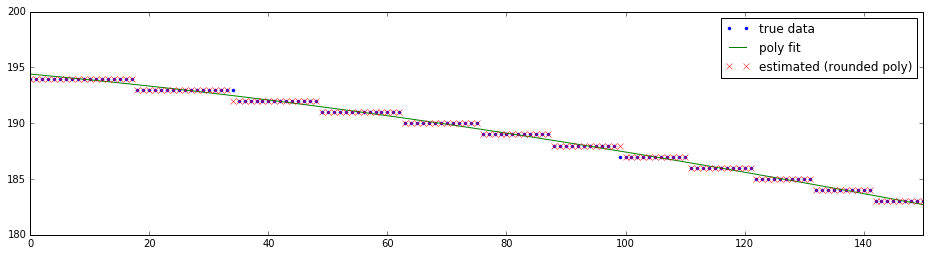

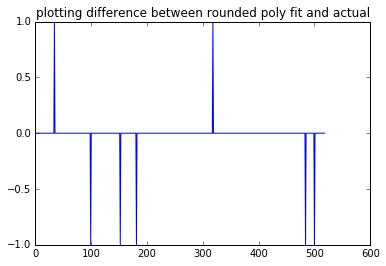

In [473]:
# Trying to model the background change

import scipy.interpolate
import itertools

for k, g in itertools.groupby(background):
    print('pixel={} # el={} | '.format(k, len(list(g))), end='')
print()

moving_bg = background[793:-80]
assert len(moving_bg) == len(background) - (793 + 80)

x = list(range(len(moving_bg)))
#spl = scipy.interpolate.UnivariateSpline(x, moving_bg, s=len(moving_bg)/10)
#print(spl.get_coeffs())
#print(spl.get_residual())
# deg=3 gets 7 wrong, deg=6 gets 6 wrong, 9 gets 5 wrong. Improvements above deg=3 I attribute to numerical issues
bgfit, residuals, rank, singular_values, rcond = np.polyfit(x, moving_bg, deg=3, full=True)

print(residuals)

print(list(bgfit))

poly = np.poly1d(bgfit)

plt.figure(figsize=(16, 4))
plt.plot(x, moving_bg, '.', label='true data')
plt.plot(x, poly(x), label='poly fit')
plt.plot(x, np.round(poly(x)), 'x', label='estimated (rounded poly)') # HACK this gets really close
plt.legend()
plt.xlim([0, 150])
plt.ylim([180, 200])

# So, let's ask: how many does our model get wrong?

plt.figure()
plt.title('plotting difference between rounded poly fit and actual')
diff = moving_bg-np.round(poly(x))
wrong_count = np.sum(np.abs(diff))
print('wrong count {} of {}, {:.02f}%'.format(wrong_count, len(moving_bg), wrong_count * 100. / len(moving_bg)))
plt.plot(x, diff)

(1000, 1300)

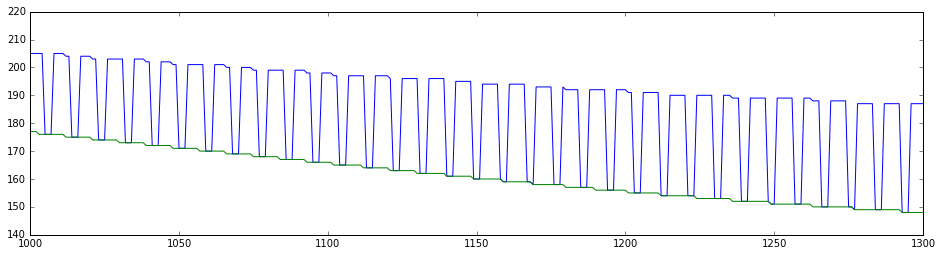

In [273]:
# Now, how do we reconstruct things given the background?
# Things seem to mostly vary with the background intensity...

# This isn't super complete, since we need to impute the background vars too
foreground = np.max(first_col[:, :, 0], axis=1)
plt.figure(figsize=(16, 4))
plt.plot(foreground)
plt.plot(background)
plt.xlim([1000, 1300])


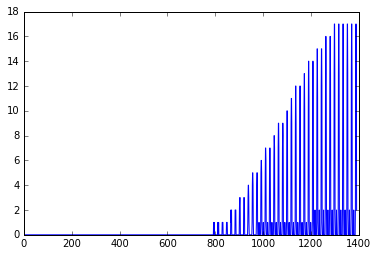

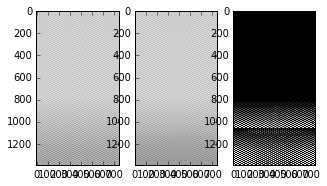

In [440]:
# Let's do the simplest thing. Take the first block, and modulate it based on how background changes.

repped = np.tile(first_vblock[:, :, np.newaxis], [h/first_vblock.shape[0], 1, c])
# HACK This adds on the footer
repped = np.concatenate([
    repped,
    # We take the first 6, aka w % repeat_width
    np.tile(first_vblock[:6, :, np.newaxis], [1, 1, c])
])

assert first_col.shape == repped.shape

generated = repped + (background-background[0])[:, np.newaxis, np.newaxis]

plt.plot(first_col[:, 0, 0] - generated[:, 0, 0])

# Doesn't really work as they don't have the same function. But let's see what it looks like!

gen = np.tile(generated, [1, w/repeat_width, 1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 15))
ax1.imshow(im)
ax2.imshow(gen)
# This diff shows some of our issues...
ax3.imshow(np.abs(im-gen) * 30)

In [275]:
# Playing with broadcasting...

hi=np.zeros((3, 4, 5)) + 4
sub = np.array([0, -1, -2])

#diffed = hi+np.tile(sub[:, np.newaxis, np.newaxis], [1, hi.shape[1], hi.shape[2]])
# We don't have to tile to get broadcasting working
diffed = hi+sub[:, np.newaxis, np.newaxis]
print(diffed[:, 0, 0])

[4. 3. 2.]


We know about the symmetries and can model the background. Now,
- Let's model the foreground. It's not the same as the background, but close.
- Let's generate first_vblock.

With the ability to generate the fg and bg gradients and the repeating
section, we can generate the entire image.

Did not work at 879 values [213.0, 212.0]
Did not work at 915 values [211.0, 210.0]
Did not work at 933 values [210.0, 209.0]
Did not work at 942 values [209.0, 208.0]
Did not work at 1140 values [196.0, 195.0]
Did not work at 1149 values [195.0, 194.0]
Did not work at 1167 values [194.0, 193.0]
Did not work at 1212 values [191.0, 190.0]
Did not work at 1275 values [188.0, 187.0]
Did not work at 1311 values [187.0, 186.0]
pixel=217.0 #=793 | pixel=216.0 #=18 | pixel=215.0 #=31 | pixel=214.0 #=14 | pixel=213.0 #=23 | pixel=212.5 #=3 | pixel=212.0 #=22 | pixel=211.0 #=11 | pixel=210.5 #=3 | pixel=210.0 #=15 | pixel=209.5 #=3 | pixel=209.0 #=6 | pixel=208.5 #=3 | pixel=208.0 #=20 | pixel=207.0 #=9 | pixel=206.0 #=19 | pixel=205.0 #=19 | pixel=204.0 #=9 | pixel=203.0 #=18 | pixel=202.0 #=9 | pixel=201.0 #=18 | pixel=200.0 #=9 | pixel=199.0 #=18 | pixel=198.0 #=9 | pixel=197.0 #=19 | pixel=196.0 #=19 | pixel=195.5 #=3 | pixel=195.0 #=6 | pixel=194.5 #=3 | pixel=194.0 #=15 | pixel=193.5 #=3 

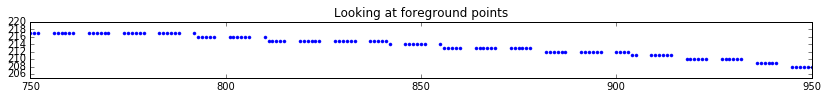

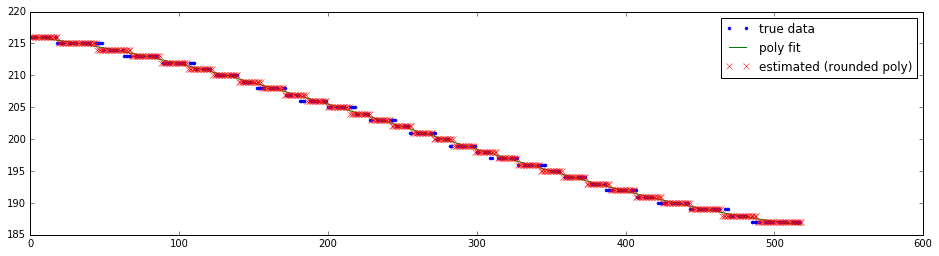

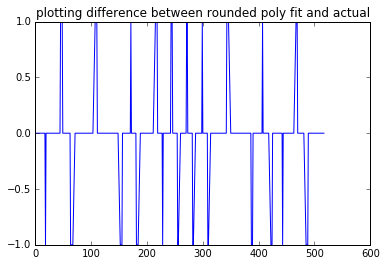

In [276]:
# Modeling fg
# Tried subtracting bg first, but that doesn't help

foreground_without_bg = foreground.copy().astype(np.float)
foreground_without_bg[foreground==background] = np.nan
foreground_without_bg_impute = foreground_without_bg.copy()

for offset in range(0, h, repeat_height):
    for idx in [offset + 6, offset + 15]:
        if idx >= h:
            continue
        rng = slice(idx, idx+3)
        assert np.all(np.isnan(foreground_without_bg[rng]))
        if foreground_without_bg[rng.start-1] != foreground_without_bg[rng.stop]:
            print('Did not work at {} values {}'.format(idx, [foreground_without_bg[rng.start-1], foreground_without_bg[rng.stop]]))
        # Just going to store an average for now...
        foreground_without_bg_impute[rng] = np.mean([foreground_without_bg[rng.start-1], foreground_without_bg[rng.stop]])

for k, g in itertools.groupby(foreground_without_bg_impute):
    print('pixel={} #={} | '.format(k, len(list(g))), end='')
print()

# Since our fg without bg looks like similar lengths as above (definitely 793 for beginning, probably 80 at the end)

plt.figure(figsize=(14, 1))
plt.title('Looking at foreground points')
plt.plot(foreground_without_bg, '.')
plt.xlim([750, 950])
plt.ylim([205, 220])

moving_fg = foreground_without_bg[793:-80]
assert len(moving_fg) == len(foreground) - (793 + 80)

x = np.array(range(len(moving_fg)))

fgfit, residuals, rank, singular_values, rcond = np.polyfit(
    x[~np.isnan(moving_fg)],
    moving_fg[~np.isnan(moving_fg)],
    deg=3, full=True)

print(residuals)

print(list(fgfit))

fgpoly = np.poly1d(fgfit)

plt.figure(figsize=(16, 4))
plt.plot(x, moving_fg, '.', label='true data')
plt.plot(x, fgpoly(x), label='poly fit')
plt.plot(x, np.round(fgpoly(x)), 'x', label='estimated (rounded poly)') # HACK this gets really close
plt.legend()
#plt.xlim([0, 150])#, 300])
#plt.ylim([180, 200])

# So, let's ask: how many does our model get wrong?

plt.figure()
plt.title('plotting difference between rounded poly fit and actual')
diff = moving_fg[~np.isnan(moving_fg)]-np.round(fgpoly(x[~np.isnan(moving_fg)]))
wrong_count = np.sum(np.abs(diff))
print('wrong count {} of {}, {:.02f}%'.format(
    wrong_count,
    len(moving_fg[~np.isnan(moving_fg)]),
    wrong_count * 100. / len(moving_fg[~np.isnan(moving_fg)])))
plt.plot(x[~np.isnan(moving_fg)], diff)

In [479]:
# Finding parameters to do alpha compositing

corner_alpha = 0.059
next_to_corner_alpha = 0.749
weird_spot_alpha = 0.125

total = 0
wrong = 0.
for offset in range(repeat_height*42, h, repeat_height):
    block = first_col[offset:offset+repeat_height, :, 0]
    chunk = block[:3, 4:7]
    circle_val = chunk[-1, 0]
    bg_val = chunk[0, -1]
    for aliased, alpha in [
        (chunk[1, 1], next_to_corner_alpha),
        (chunk[0, 1], corner_alpha),
        (chunk[2, 2], weird_spot_alpha), # ???? XXXXXXX this weird little spot...
    ]:
        guess = alpha * circle_val + (1-alpha) * bg_val
        total += 1
        if round(guess) != aliased:
            wrong += 1
        # Can solve for them with this: derived by playing with examples and 1 = alpha + beta
        alphag = (1. * aliased - bg_val) / (1. * circle_val - bg_val)
        #print(alphag)

print('Total wrong {} out of {}, {:.02f}%'.format(wrong, total, wrong*100/total))

Total wrong 30.0 out of 108, 27.78%


In [480]:
# Using our above parameters to generate the circles...

circle_alpha = np.array([
    [corner_alpha, next_to_corner_alpha, 1., 1., next_to_corner_alpha, corner_alpha],
    [next_to_corner_alpha, 1., 1., 1., 1., next_to_corner_alpha],
    [1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1.],
    [next_to_corner_alpha, 1., 1., 1., 1., next_to_corner_alpha],
    [corner_alpha, next_to_corner_alpha, 1., 1., next_to_corner_alpha, corner_alpha],
])

def gen_block(start_row, fg, bg):
    result = np.zeros((repeat_height, repeat_width))
    # Make everything have the right bg
    result += bg[start_row:start_row+repeat_height, np.newaxis]

    def _draw_circle(row, col):
        result[row:row+6, col:col+6] = (
            circle_alpha * fg[start_row+row:start_row+row+6, np.newaxis] +
            (1-circle_alpha) * bg[start_row+row:start_row+row+6, np.newaxis]
        )

    # Then draw our circles
    _draw_circle(0, 0)
    _draw_circle(9, 6)

    # HACK the weird spots..
    result[2, 6] = weird_spot_alpha * fg[start_row+2] + (1-weird_spot_alpha) * bg[start_row+2]
    result[11, 0] = weird_spot_alpha * fg[start_row+11] + (1-weird_spot_alpha) * bg[start_row+11]

    return np.round(result).astype(np.int)

print('generated')
for idx in range(0, h, repeat_height):
    actual = first_col[idx:idx+repeat_height, :, 0]
    generated = gen_block(idx, foreground, background)
    print('diff', np.sum(np.abs(actual-generated)))
    #print(actual)
    #print(generated)
    #print(actual-generated)

generated
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 8
diff 22
diff 24
diff 8
diff 14
diff 14
diff 14
diff 12
diff 8
diff 8
diff 2
diff 10
diff 5
diff 4
diff 0
diff 8
diff 0
diff 6
diff 8
diff 8
diff 8
diff 16
diff 8
diff 8
diff 9
diff 20
diff 4
diff 12
diff 16
diff 0
diff 0
diff 0
diff 0
diff 0


ValueError: operands could not be broadcast together with shapes (18,12) (6,1) (18,12) 

(array([ 131688.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0., 2931360.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,   43896.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

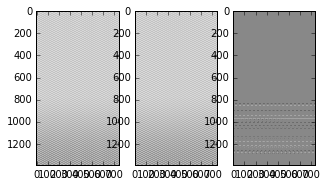

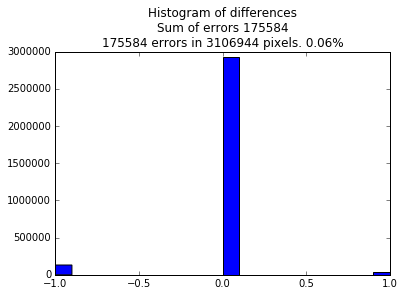

In [482]:
# Putting it all together...

bgfit = [3.09835296e-07, -2.40692464e-04, -4.88381708e-02, 1.94399232e+02]
fgfit = [2.14403711e-07, -1.66935758e-04, -2.80828886e-02, 2.16077259e+02]

# First we generate fg and bg
first_chunk_length = 793
last_chunk_length = 80

xval = range(h-first_chunk_length-last_chunk_length)

fg = np.zeros((h,))
fg[:first_chunk_length] = 217
fg[first_chunk_length:-last_chunk_length] = np.round(np.poly1d(fgfit)(xval)).astype(np.int)
fg[-last_chunk_length:] = 186

bg = np.zeros((h,))
bg[:first_chunk_length] = 195
bg[first_chunk_length:-last_chunk_length] = np.round(np.poly1d(bgfit)(xval)).astype(np.int)
bg[-last_chunk_length:] = 147

# Now gen the blocks
result = np.concatenate([
    gen_block(start_row-repeat_height if start_row == h-6 else start_row, fg, bg)
    for start_row in range(0, h, repeat_height)
])
# HACK need to clip from end of this...
result = result[:h, :]

# And we add color channels
result = np.tile(result[:, :, np.newaxis], [1, w/repeat_width, c])

assert result.shape == (1392, 744, 3)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 15))
ax1.imshow(im)
ax2.imshow(result.astype(np.uint8))
# Our diff. Pretty random?
ax3.imshow((im - result) * 30 + 120)

# So at least the differences are all -1 or +1
sum_of_error = np.sum(np.abs((im-result)))
num_errors = np.sum((im-result) != 0)
plt.figure()
plt.title('Histogram of differences\nSum of errors {}\n{} errors in {} pixels. {:.02f}%'.format(
    sum_of_error,
    num_errors,
    np.prod(im.shape),
    float(num_errors) / np.prod(im.shape),
))
plt.hist((im-result).flatten(), bins=20)

In [472]:
imageio.imwrite('generated.png', result.astype(np.uint8))

![generated.png](generated.png)